In [2]:
from glob import glob
from src.systems.humanoid.system import HumanoidSystem
from src.flow_matching.humanoid.latent_conditional.flow_matcher import HumanoidLatentConditionalFlowMatcher
from matplotlib import pyplot as plt

import numpy as np
import os
import torch

data_dir = "/common/users/shared/pracsys/genMoPlan/data_trajectories/humanoid_get_up_slow"
roa_file = "/common/users/shared/pracsys/genMoPlan/data_trajectories/humanoid_get_up_slow/roa_labels.txt"
bounds_file = "/common/users/dm1487/arcmg_datasets/humanoid_get_up/humanoid_data_bounds.pkl"
system = HumanoidSystem(bounds_file=bounds_file, use_dynamic_bounds=True, head_height_threshold=1.4, torso_z_threshold=0.9, speed_threshold=0.2)

ckpt_path = "/common/home/dm1487/robotics_research/tripods/olympics-classifier/outputs/humanoid_slow_balanced/2025-11-02_20-59-38"
flow_matcher = HumanoidLatentConditionalFlowMatcher.load_from_checkpoint(ckpt_path, device="cuda:0")


✅ Loaded Humanoid bounds from: /common/users/dm1487/arcmg_datasets/humanoid_get_up/humanoid_data_bounds.pkl
📊 Per-Dimension Normalization Limits:

   Euclidean Block 1 (dims 0-33):
     [ 0]: ±  0.859
     [ 1]: ±  1.375
     [ 2]: ±  0.725
     [ 3]: ±  0.526
     [ 4]: ±  0.633
     ... (29 more dimensions)

   Sphere (dims 34-36): NO NORMALIZATION (unit norm)

   Euclidean Block 2 (dims 37-66):
     [37]: ±  1.914
     [38]: ±  1.916
     [39]: ±  3.328
     [40]: ±  2.790
     [41]: ±  2.940
     ... (25 more dimensions)

Loaded Humanoid bounds from: /common/users/dm1487/arcmg_datasets/humanoid_get_up/humanoid_data_bounds.pkl
📁 Folder provided: /common/home/dm1487/robotics_research/tripods/olympics-classifier/outputs/humanoid_slow_balanced/2025-11-02_20-59-38
🔍 Searching for checkpoint in folder...
   ✓ Found best checkpoint (val_loss=0.1367)
   📄 Using: epoch27-val_loss0.1367.ckpt
🤖 Loading Humanoid LCFM checkpoint: /common/home/dm1487/robotics_research/tripods/olympics-classifier

In [3]:
roa_data = np.loadtxt(roa_file, delimiter=",")
inp, labels = roa_data[:, :67], roa_data[:, 67]
inp = torch.from_numpy(inp).float().to("cuda:0")
labels = torch.from_numpy(labels).long().to("cuda:0")
np.mean(roa_data[:, 67] == 0)


0.6168666666666667

In [4]:
idx = 9509
samples = 100
repeats = 1
print("Success", (labels[idx] == 1).item())
all_head_heights = []

for _ in range(samples):
    model_input = inp[idx:idx+1, :].clone()
    head_height = []
    for i in range(repeats):
        pred = flow_matcher.predict_endpoint(model_input)
        head_height.append(pred[:, 21].item())
        model_input = pred.clone()
    all_head_heights.append(head_height)
    
print(all_head_heights)
print(sum(np.array(all_head_heights) > 1.4))
print(sum(np.array(all_head_heights) < 1.4))

Success True
[[0.17962521314620972], [0.2063714563846588], [0.19128645956516266], [0.24620172381401062], [0.12011036276817322], [0.07495126128196716], [0.18342070281505585], [0.0598372146487236], [0.1857040822505951], [0.1642250120639801], [0.06859998404979706], [0.1280897706747055], [0.05196591466665268], [0.11108234524726868], [0.13323941826820374], [0.18724749982357025], [0.07874458283185959], [0.04140311852097511], [0.11468921601772308], [0.20760223269462585], [0.07831250131130219], [0.1976243555545807], [0.17070774734020233], [0.11625514924526215], [0.1841507852077484], [0.19895830750465393], [0.07360424846410751], [0.14342950284481049], [0.0866890400648117], [0.07448403537273407], [0.06912855803966522], [0.11912530660629272], [0.16007231175899506], [0.07059210538864136], [0.05783747881650925], [0.17795313894748688], [0.1843017190694809], [0.08124598115682602], [0.10083478689193726], [0.0812741219997406], [0.13689616322517395], [0.09453806281089783], [0.07666482776403427], [0.0555

In [4]:
all_head_heights

[[0.12167128920555115],
 [0.1796601414680481],
 [0.18840926885604858],
 [0.29458871483802795],
 [0.1895340234041214],
 [0.2020183503627777],
 [0.25195586681365967],
 [0.10667217522859573],
 [0.15335223078727722],
 [0.12803608179092407],
 [0.15460316836833954],
 [0.2306673228740692],
 [0.08183044195175171],
 [0.1339869499206543],
 [0.04560115933418274],
 [0.18154321610927582],
 [0.16295547783374786],
 [0.3214291036128998],
 [0.1844739466905594],
 [0.20484831929206848],
 [0.11352148652076721],
 [0.12492813169956207],
 [0.08401110768318176],
 [0.10423040390014648],
 [0.2226107120513916],
 [0.2647705078125],
 [0.09340748190879822],
 [0.14404909312725067],
 [0.1800229251384735],
 [0.24634435772895813],
 [0.12017844617366791],
 [0.16720697283744812],
 [0.11896656453609467],
 [0.14294227957725525],
 [0.16771718859672546],
 [0.12082064151763916],
 [0.261459618806839],
 [0.23149575293064117],
 [0.10074484348297119],
 [0.2520882189273834],
 [0.15087220072746277],
 [0.1523015797138214],
 [0.13263

ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

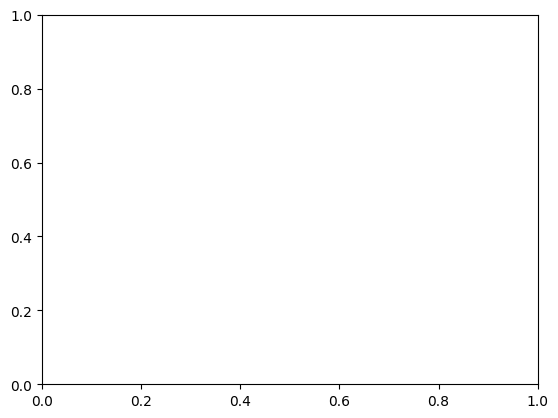

In [5]:
# 1d plot of head height
plt.plot([0]*samples, head_height, "o")
plt.show()


In [145]:
success_count = 0
failure_count = 0
success_lengths = []
failure_lengths = []
from tqdm import tqdm

for file in tqdm(glob(os.path.join(data_dir, "trajectories/*.txt"))):
    data = np.loadtxt(file, delimiter=",")
    success = False
    if system.is_in_attractor(data[-1:]).item():
        success_count += 1
        success_lengths.append(data.shape[0])
    else:
        failure_count += 1
        failure_lengths.append(data.shape[0])
        
    if (success_count + failure_count) % 1000 == 0:
        print(f"Success count: {success_count}")
        print(f"Failure count: {failure_count}")
        print(f"Success rate: {success_count / (success_count + failure_count)}")
        print(f"Failure rate: {failure_count / (success_count + failure_count)}")
        print(f"Success lengths: {np.median(success_lengths)}")
        print(f"Failure lengths: {np.median(failure_lengths)}")

  7%|▋         | 1012/15000 [00:07<01:47, 130.12it/s]

Success count: 403
Failure count: 597
Success rate: 0.403
Failure rate: 0.597
Success lengths: 446.0
Failure lengths: 436.0


 13%|█▎        | 2012/15000 [00:15<01:39, 130.12it/s]

Success count: 784
Failure count: 1216
Success rate: 0.392
Failure rate: 0.608
Success lengths: 446.0
Failure lengths: 438.5


 20%|██        | 3017/15000 [00:23<01:33, 127.49it/s]

Success count: 1166
Failure count: 1834
Success rate: 0.38866666666666666
Failure rate: 0.6113333333333333
Success lengths: 446.0
Failure lengths: 441.0


 27%|██▋       | 4014/15000 [00:31<01:24, 130.44it/s]

Success count: 1546
Failure count: 2454
Success rate: 0.3865
Failure rate: 0.6135
Success lengths: 446.0
Failure lengths: 436.0


 33%|███▎      | 5023/15000 [00:39<01:16, 130.99it/s]

Success count: 1922
Failure count: 3078
Success rate: 0.3844
Failure rate: 0.6156
Success lengths: 441.0
Failure lengths: 436.0


 40%|████      | 6014/15000 [00:46<01:09, 130.14it/s]

Success count: 2327
Failure count: 3673
Success rate: 0.3878333333333333
Failure rate: 0.6121666666666666
Success lengths: 441.0
Failure lengths: 436.0


 47%|████▋     | 7012/15000 [00:54<01:00, 131.99it/s]

Success count: 2695
Failure count: 4305
Success rate: 0.385
Failure rate: 0.615
Success lengths: 441.0
Failure lengths: 441.0


 53%|█████▎    | 8019/15000 [01:02<00:52, 132.82it/s]

Success count: 3075
Failure count: 4925
Success rate: 0.384375
Failure rate: 0.615625
Success lengths: 441.0
Failure lengths: 441.0


 60%|██████    | 9025/15000 [01:10<00:46, 127.77it/s]

Success count: 3438
Failure count: 5562
Success rate: 0.382
Failure rate: 0.618
Success lengths: 441.0
Failure lengths: 436.0


 67%|██████▋   | 10017/15000 [01:17<00:38, 128.60it/s]

Success count: 3807
Failure count: 6193
Success rate: 0.3807
Failure rate: 0.6193
Success lengths: 441.0
Failure lengths: 436.0


 74%|███████▎  | 11026/15000 [01:25<00:30, 131.35it/s]

Success count: 4196
Failure count: 6804
Success rate: 0.38145454545454544
Failure rate: 0.6185454545454545
Success lengths: 441.0
Failure lengths: 436.0


 80%|████████  | 12014/15000 [01:33<00:22, 132.48it/s]

Success count: 4597
Failure count: 7403
Success rate: 0.38308333333333333
Failure rate: 0.6169166666666667
Success lengths: 441.0
Failure lengths: 436.0


 87%|████████▋ | 13019/15000 [01:41<00:15, 128.00it/s]

Success count: 5007
Failure count: 7993
Success rate: 0.3851538461538462
Failure rate: 0.6148461538461538
Success lengths: 441.0
Failure lengths: 436.0


 93%|█████████▎| 14023/15000 [01:48<00:07, 130.99it/s]

Success count: 5388
Failure count: 8612
Success rate: 0.38485714285714284
Failure rate: 0.6151428571428571
Success lengths: 441.0
Failure lengths: 436.0


100%|██████████| 15000/15000 [01:56<00:00, 128.74it/s]

Success count: 5747
Failure count: 9253
Success rate: 0.3831333333333333
Failure rate: 0.6168666666666667
Success lengths: 441.0
Failure lengths: 436.0


In [147]:

print(f"Success count: {success_count}")
print(f"Failure count: {failure_count}")
print(f"Success rate: {success_count / (success_count + failure_count)}")
print(f"Failure rate: {failure_count / (success_count + failure_count)}")

Success count: 5747
Failure count: 9253
Success rate: 0.3831333333333333
Failure rate: 0.6168666666666667


In [30]:
print(f"Success lengths: {np.median(success_lengths)}")
print(f"Failure lengths: {np.median(failure_lengths)}")

Success lengths: 192.0
Failure lengths: 441.0
